In [1]:
%matplotlib inline
import gc
import pandas as pd
import glob
import sklearn
import numpy as np
import matplotlib
matplotlib.use('Agg')

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()

In [2]:
diFiles=glob.glob("../Di/*")
diFiles

['../Di/Jnk.csv',
 '../Di/IRF4.csv',
 '../Di/LEF1.csv',
 '../Di/Ikk2.csv',
 '../Di/CTNNB1.csv',
 '../Di/Erk.csv',
 '../Di/MYC.csv']

In [3]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../Dc/'+f.split("/")[-1].split(".")[0]+".csv"
    diRead = pd.read_csv(fpath,sep=";")
    diPartialTrain=diRead[diRead.columns[5:]].loc[indexList].copy()
    diPartialTrain.insert(0,column='Protein',value =protein )
    del diRead
    gc.collect()
    frames.append(diPartialTrain)

In [4]:
diTrain = pd.concat(frames)

In [5]:
diTrain.to_csv("../FullTrain/FullTrainDI/FullTrainDI.csv")

In [6]:
diTrain.head()

,Protein,X0min_neg_effect-X0min_neg_cause,X15min_effect-X0min_neg_cause,X15min_effect-X15min_cause,X30min_effect-X0min_neg_cause,X30min_effect-X15min_cause,X30min_effect-X30min_cause,X90min_effect-X0min_neg_cause,X90min_effect-X15min_cause,X90min_effect-X30min_cause,...,X240min_effect-X240min_cause,X360min_effect-X0min_neg_cause,X360min_effect-X15min_cause,X360min_effect-X30min_cause,X360min_effect-X90min_cause,X360min_effect-X120min_cause,X360min_effect-X180min_cause,X360min_effect-X210min_cause,X360min_effect-X240min_cause,X360min_effect-X360min_cause
1530,LEF1,1.023241,0.724441,0.818558,0.563618,0.484836,0.672051,-0.033114,-0.013766,0.068516,...,1.759207,0.168689,0.138546,0.072377,-0.208468,0.002047,-0.033598,0.196686,-0.146813,0.336667
1531,LEF1,0.169366,0.093080,0.621927,0.102329,0.108679,0.166695,0.022466,0.021222,0.052001,...,0.422824,-0.093931,0.017554,-0.044028,-0.024721,-0.009345,0.050461,-0.073455,-0.042127,0.806875
1532,LEF1,1.887236,0.981507,2.324589,0.764263,0.324520,1.247644,-0.241862,-0.431564,-0.149245,...,0.462031,0.728134,0.877128,0.352315,-0.127248,-0.097222,-0.054824,0.538076,0.111132,1.637100
1533,LEF1,0.237701,-0.071842,0.166615,0.123891,-0.070192,0.429748,-0.033902,0.010897,-0.006371,...,0.559448,-0.021912,0.067405,-0.021690,0.000144,0.007487,0.128203,-0.146404,0.111754,0.439802
1535,LEF1,0.757642,0.409183,0.489564,-0.257325,-0.228940,0.444693,0.024037,0.013811,0.029758,...,1.067780,0.156884,0.128128,-0.064193,0.042174,0.131908,0.014193,0.045039,0.037291,0.423915


In [7]:
lstn_clusters=range(2,30)

In [8]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [16]:
file = open('../ClusteringOutputs/DI_Clustering/diMiniBatch.txt','w')  
bestOut = open('../ClusteringOutputs/DI_Clustering/diBestMiniBatch.txt','w') 
file.write("n_clusters,s_score\n")

19

In [25]:
dfLabels=pd.DataFrame()

In [26]:
dfLabels['Protein'] = diTrain['Protein'].tolist()

In [27]:
max_silhouette=0
nClusters=2

for n in lstn_clusters:
    mbk=MiniBatchKMeans(init='k-means++', n_clusters=n
                        , max_no_improvement=10, verbose=0)
    mbk.fit(diTrain[diTrain.columns[1:]])
    labels = mbk.labels_
    s_score = silhouette_score(diTrain[diTrain.columns[1:]], labels, metric='euclidean')
    dfLabels['NClusters'+str(n)] = n
    dfLabels['Labels_'+str(n)] =labels
    file.write(str(n)+",")
    file.write(str(s_score)+"\n")
    if s_score>max_silhouette:
        max_silhouette = s_score
        nClusters=n
#t_mini_batch = time.time() - t0    
#print("Num clusters " + str(n))
bestOut.write("Num clusters " + str(n))
#print("Silhouette score " + str(max_silhouette))
bestOut.write("Silhouette score " + str(max_silhouette))
#print("Running time " + str(t_mini_batch))
file.close()
bestOut.close()
file.close()
bestOut.close()

In [22]:
type(dfLabels)

list

In [28]:
dfLabels.head()

,Protein,NClusters2,Labels_2,NClusters3,Labels_3,NClusters4,Labels_4,NClusters5,Labels_5,NClusters6,...,NClusters25,Labels_25,NClusters26,Labels_26,NClusters27,Labels_27,NClusters28,Labels_28,NClusters29,Labels_29
0,LEF1,2,0,3,0,4,1,5,0,6,...,25,9,26,13,27,18,28,15,29,1
1,LEF1,2,0,3,0,4,1,5,0,6,...,25,5,26,0,27,15,28,2,29,21
2,LEF1,2,0,3,0,4,3,5,0,6,...,25,0,26,13,27,23,28,1,29,9
3,LEF1,2,0,3,0,4,1,5,0,6,...,25,5,26,0,27,15,28,2,29,21
4,LEF1,2,0,3,0,4,1,5,0,6,...,25,5,26,0,27,15,28,2,29,21


In [30]:
dfLabels.to_csv('../ClusteringOutputs/DI_Clustering/DILabelsKmeans.csv')

In [29]:
mbk=MiniBatchKMeans(init='k-means++', n_clusters=5
                        , max_no_improvement=10, verbose=0)
mbk.fit(diTrain[diTrain.columns[1:]])
labels = mbk.labels_
s_score = silhouette_score(diTrain[diTrain.columns[1:]], labels, metric='euclidean')

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3, svd_solver='full')

In [12]:
pca.fit(diTrain[diTrain.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [13]:
pca_3d = pca.transform(diTrain[diTrain.columns[1:]]).T

In [14]:
len(pca_3d)

3

In [15]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [16]:
x=pca_3d[0]
y=pca_3d[1]
z=pca_3d[2]

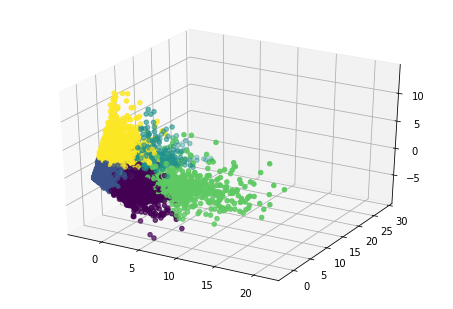

In [30]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,c=labels)
pyplot.show()

In [27]:
import matplotlib
matplotlib.use('Agg')

/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'TkAgg' by the following code:
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/a20125359/anaconda3/envs/Biclustering/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/a20125359/anaconda3